In [ ]:
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import math
import matplotlib.pyplot as plt
dataset_path = "./drive/MyDrive/DSVN.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dữ liệu được crawl về từ trang https://www.worldometers.info/world-population/vietnam-population/

In [ ]:
dt = pd.read_csv(dataset_path)
dt

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,VietnamGlobal Rank
0,2020,97.338.579,"0,91",876.473,-80.000,"32,5","2,06",314,"37,7",36.727.248,"1,25",7.794.798.739,15
1,2019,96.462.106,"0,96",916.144,-80.000,"30,9","1,98",311,37,35.686.730,"1,25",7.713.468.100,15
2,2018,95.545.962,1,945.314,-80.000,"30,9","1,98",308,"36,3",34.658.961,"1,25",7.631.091.040,15
3,2017,94.600.648,"1,03",960.226,-80.000,"30,9","1,98",305,"35,6",33.642.498,"1,25",7.547.858.925,15
4,2016,93.640.422,"1,04",963.346,-80.000,"30,9","1,98",302,"34,9",32.635.787,"1,25",7.464.022.049,15
5,2015,92.677.076,"1,05",941.885,-80.000,"30,5","1,96",299,"34,1",31.635.369,"1,26",7.379.797.139,14
6,2010,87.967.651,"0,97",826.998,-159.994,"28,5","1,93",284,"30,6",26.910.696,"1,26",6.956.823.603,13
7,2005,83.832.661,"0,96",784.450,-130.200,"26,4","1,92",270,"27,4",23.000.555,"1,28",6.541.907.027,13
8,2000,79.910.412,"1,3",999.990,-43.200,"24,2","2,25",258,"24,5",19.568.590,"1,3",6.143.493.823,13
9,1995,74.910.461,"1,96",1.384.320,-78.847,"22,3","3,23",242,"22,3",16.668.571,"1,3",5.744.212.979,13


In [ ]:
dt.columns

Index(['Year', 'Population', 'Yearly %  Change', 'Yearly Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', 'Country's Share of World Pop',
       'World Population', 'VietnamGlobal Rank'],
      dtype='object')

In [ ]:
def dtype_process(dtstr):
  if type(dtstr) == str:
    return float(dtstr.replace('.', '').replace(',', '.'))
  else: return float(dtstr)

In [ ]:
for i in dt.columns:
  for j in dt.index:
    dt[i][j] = dtype_process(dt[i][j])
dt = dt.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Số dân thành thị qua các năm

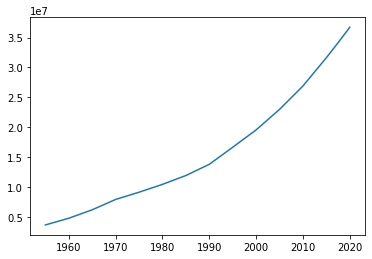

In [ ]:
plt.plot(dt['Year'], dt['Urban Population'])
plt.show()

Vì dữ liệu có các dữ liệu từ những năm cũ sẽ gây nhiễu và làm cho dữ liệu không còn nằm trên một đường thẳng. Nên ta chỉ sử dụng các dòng dữ liệu từ các năm gần đây và các cột tỷ lệ thuận với cột nhãn cần dự đoán để có kết quả tốt nhất

In [ ]:
df = dt[['Year', 'Population', 'Density (P/Km²)', 'Urban Population']][0:6]
df

,Year,Population,Density (P/Km²),Urban Population
0,2020.0,97338579.0,314.0,36727248.0
1,2019.0,96462106.0,311.0,35686730.0
2,2018.0,95545962.0,308.0,34658961.0
3,2017.0,94600648.0,305.0,33642498.0
4,2016.0,93640422.0,302.0,32635787.0
5,2015.0,92677076.0,299.0,31635369.0


Ta có tập dữ liệu để dự đoán gồm 6 dòng với 3 thuộc tính (Year, Population, Density) và 1 nhãn (Urban Population)

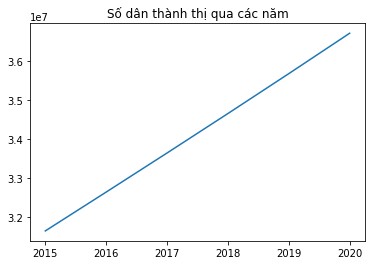

In [ ]:
plt.plot(df['Year'], df['Urban Population'])
plt.title('Số dân thành thị qua các năm')
plt.show()

Chia tập dữ liệu thành train test và validate

In [ ]:
test = df[0:1]
val = df[1:2]
train = df[2:]

Khởi tạo các tham số và kernel khác nhau cho SVM

In [ ]:
a = 1.0
C = []
for i in range(5):
  a*=10
  C.append(a)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
ep = [ float(i)*0.1 for i in range(1, 6)]
case = []
for a in C:
  for b in kernels:
    for c in ep:
      case.append([a, b, c])

Huấn luyện mô hình với các kernel và tham số khác nhau

In [ ]:
max = 0
min_error = 100000000000.0
X_train = train[train.columns[0:3]]
Y_train = train[train.columns[3]]
X_val = val[val.columns[0:3]]
Y_val = val[val.columns[3]]
for i in range(len(case)):
  regr = make_pipeline(StandardScaler(), SVR(C=case[i][0], kernel=case[i][1], epsilon=case[i][2]))
  regr.fit(X_train, Y_train)
  pred = regr.predict(X_val)[0]
  error = abs((Y_val[1] - pred))
  if error < min_error:
    max = i
    min_error = error

Bộ tham số cho kết quả tốt nhất

In [ ]:
case[max]

[100000.0, 'linear', 0.1]

Dự đoán cho tập Test với mô hình có kết quả tốt nhất trên tập validate 

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=case[max][0], kernel=case[max][1], epsilon=case[max][2]))
regr.fit(X_train, Y_train)
pred = regr.predict(test[test.columns[0:3]])

Sai số so với thực tế

In [ ]:
print('Số dân thành thị của năm cần dự đoán (2020): ', test['Urban Population'][0])
print('Dự đoán của mô hình: ', pred[0])
print('Sai số: ', abs(test['Urban Population'][0] - pred[0]))

Số dân thành thị của năm cần dự đoán (2020):  36727248.0
Dự đoán của mô hình:  36456179.550875835
Sai số:  271068.4491241649


Dự đoán cho toàn bộ tập dữ liệu dùng để huấn luyện

In [ ]:
pred_all = regr.predict(df[df.columns[0:3]])

Biểu đồ thể hiện giá trị thực tế (màu xanh) so với giá trị dự đoán (màu đỏ)


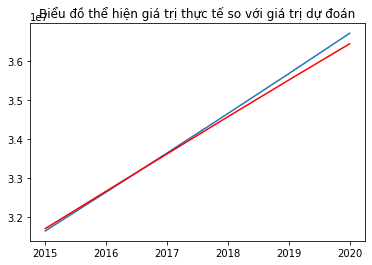

In [ ]:
plt.plot(df['Year'], df['Urban Population'])
plt.plot(df['Year'], pred_all, color = 'r')
plt.title('Biểu đồ thể hiện giá trị thực tế so với giá trị dự đoán')
plt.show()